In [7]:
# Импорт того что пригодится
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загрузка данных
train_data = pd.read_parquet('train_dataset_hackaton2023_train.parquet')

# Преобразование столбца с датой и временем в соответствующий формат
train_data['startdatetime'] = pd.to_datetime(train_data['startdatetime'])

In [5]:
# Извлекаем день недели (где понедельник = 0, воскресенье = 6)
train_data['day_of_week'] = train_data['startdatetime'].dt.dayofweek

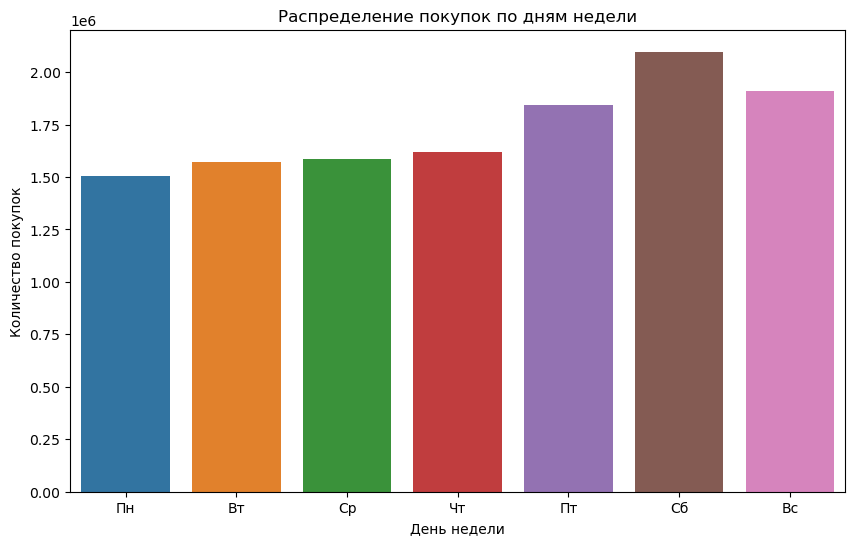

In [8]:
# Визуализация распределения дней недели с помощью графика
plt.figure(figsize=(10, 6))
sns.countplot(x=train_data['day_of_week'])
plt.title('Распределение покупок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество покупок')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()

In [9]:
# Теперь вы можем анализировать покупки каждого клиента отдельно
# Группировка данных по клиентам и дням недели, подсчет количества покупок
customer_weekday = train_data.groupby(['customer_id', 'day_of_week']).size().reset_index(name='count')

In [10]:
# Проверка на регулярность покупок по дням недели для каждого клиента
customer_regularity = customer_weekday.pivot(index='customer_id', columns='day_of_week', values='count').fillna(0)

In [11]:
#строки - это клиенты, а столбцы - дни недели
# Значения в ячейках - количество покупок в соответствующий день недели
print(customer_regularity)

day_of_week     0     1     2     3     4     5    6
customer_id                                         
29891         7.0   2.0  10.0   6.0   6.0   3.0  0.0
30477        11.0  20.0   9.0  13.0   8.0   0.0  0.0
31426        20.0   6.0  17.0   1.0  25.0  17.0  0.0
44491         0.0   0.0   0.0   0.0   0.0   8.0  2.0
44939         0.0   0.0   0.0   0.0   0.0  18.0  7.0
...           ...   ...   ...   ...   ...   ...  ...
46624509      6.0   5.0   0.0   0.0   0.0   0.0  0.0
46625265     13.0   0.0   0.0   0.0   0.0   0.0  0.0
46639170     11.0   0.0   0.0   0.0   0.0   0.0  0.0
46654016      0.0   6.0   0.0   0.0   0.0   0.0  0.0
46661804      0.0  15.0   0.0   0.0   0.0   0.0  0.0

[500000 rows x 7 columns]


In [12]:
# Сначала группируем данные по 'customer_id' и 'startdatetime' для идентификации уникальных чеков
unique_checks = train_data.groupby(['customer_id', 'startdatetime']).size().reset_index(name='count')

In [13]:
# Теперь 'unique_checks' содержит каждый уникальный чек
# Преобразуем 'startdatetime' в datetime, если это еще не было сделано
unique_checks['startdatetime'] = pd.to_datetime(unique_checks['startdatetime'])

In [14]:
# Извлечение дня недели
unique_checks['day_of_week'] = unique_checks['startdatetime'].dt.dayofweek

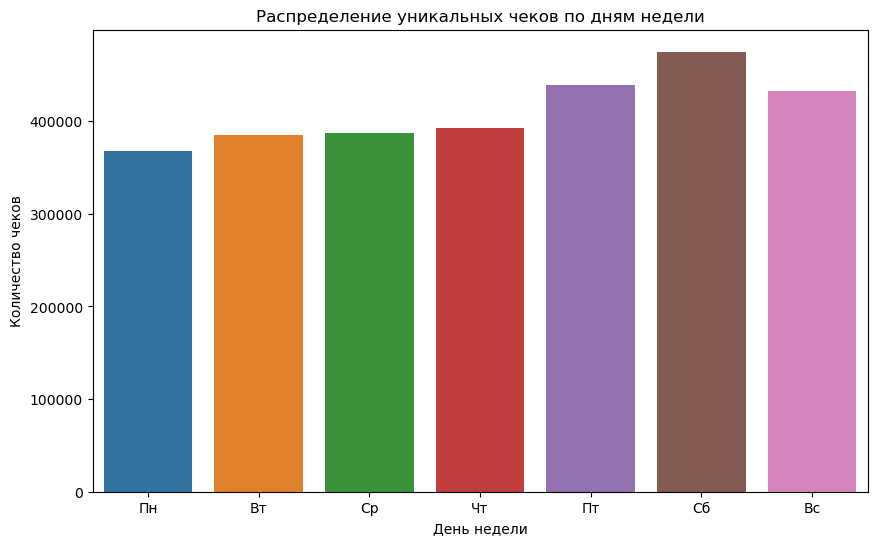

In [15]:
# Теперь для визуализации мы используем 'unique_checks'
plt.figure(figsize=(10, 6))
sns.countplot(x=unique_checks['day_of_week'])
plt.title('Распределение уникальных чеков по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество чеков')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()


In [16]:
# Для анализа закономерностей повторяем группировку уже с уник. чеками
customer_weekday_checks = unique_checks.groupby(['customer_id', 'day_of_week']).size().reset_index(name='count')


In [17]:
# данные для анализа
customer_regularity_checks = customer_weekday_checks.pivot(index='customer_id', columns='day_of_week', values='count').fillna(0)


In [18]:
# Анализируем DataFrame на предмет закономерностей
print(customer_regularity_checks)

day_of_week    0    1    2    3    4    5    6
customer_id                                   
29891        4.0  2.0  7.0  5.0  5.0  2.0  0.0
30477        3.0  8.0  5.0  5.0  4.0  0.0  0.0
31426        4.0  2.0  5.0  1.0  8.0  4.0  0.0
44491        0.0  0.0  0.0  0.0  0.0  3.0  1.0
44939        0.0  0.0  0.0  0.0  0.0  2.0  1.0
...          ...  ...  ...  ...  ...  ...  ...
46624509     2.0  1.0  0.0  0.0  0.0  0.0  0.0
46625265     3.0  0.0  0.0  0.0  0.0  0.0  0.0
46639170     3.0  0.0  0.0  0.0  0.0  0.0  0.0
46654016     0.0  3.0  0.0  0.0  0.0  0.0  0.0
46661804     0.0  3.0  0.0  0.0  0.0  0.0  0.0

[500000 rows x 7 columns]


In [19]:
# Используем уже подготовленный DataFrame unique_checks из предыдущего шага

# Выбираем чеки, совершенные в выходные дни
weekend_checks = unique_checks[unique_checks['day_of_week'].isin([5, 6])]

# Группируем по клиентам и подсчитываем количество чеков в выходные
weekend_customer_checks = weekend_checks.groupby('customer_id').size().reset_index(name='weekend_count')

# Группируем по клиентам и подсчитываем общее количество чеков для каждого клиента
total_customer_checks = unique_checks.groupby('customer_id').size().reset_index(name='total_count')

# Объединяем данные, чтобы увидеть общее количество чеков и количество чеков в выходные для каждого клиента
customer_weekend_total = total_customer_checks.merge(weekend_customer_checks, on='customer_id', how='left')

# Заполняем нулями отсутствующие значения (это означает, что клиент не совершал покупок в выходные)
customer_weekend_total['weekend_count'] = customer_weekend_total['weekend_count'].fillna(0)

# Находим клиентов, которые покупают только в выходные
weekend_only_customers = customer_weekend_total[customer_weekend_total['weekend_count'] == customer_weekend_total['total_count']]

# Количество клиентов, которые покупают еду только в выходные
weekend_only_customer_count = weekend_only_customers.shape[0]

print(f"Количество клиентов, которые покупают еду только в выходные: {weekend_only_customer_count}")

Количество клиентов, которые покупают еду только в выходные: 28224
